## Set the GPU

In [ ]:
# import tensorflow as tf
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
# import tensorflow as tf

# # for moving data into GPU (if available)
# def get_default_device():
#     """Pick GPU if available, else CPU"""
#     if tf.config.list_physical_devices('GPU'):
#         return tf.config.experimental.list_physical_devices('GPU')[0]
#     else:
#         return '/CPU:0'  # Return CPU if GPU is not available

# def to_device(data, device):
#     """Move tensor(s) to chosen device"""
#     return tf.convert_to_tensor(data)

# # Class for data loading
# class DeviceDataLoader():
#     """Wrap a dataloader to move data to a device"""
#     def __init__(self, dl, device):
#         self.dl = dl
#         self.device = device

#     def __iter__(self):
#         """Yield a batch of data after moving it to device"""
#         for b in self.dl:
#             yield to_device(b, self.device)

#     def __len__(self):
#         """Number of batches"""
#         return len(self.dl)


In [ ]:
# # Example usage
# device = get_default_device()
# print(f"Using device: {device}")

Using device: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [ ]:
# tf.config.experimental.get_memory_info('GPU:0')['current'] / 10**9

0.0

## Import the necessary modules

In [1]:
!pip install --upgrade tensorflow keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 929.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 646.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow

In [2]:
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 63.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [3]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.1 MB/s eta 0:00:00


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d pkdarabi/diagnosis-of-diabetic-retinopathy

Dataset URL: https://www.kaggle.com/datasets/pkdarabi/diagnosis-of-diabetic-retinopathy
License(s): Attribution 4.0 International (CC BY 4.0)
 60% 18.0M/30.1M [00:00<00:00, 72.0MB/s]
100% 30.1M/30.1M [00:00<00:00, 87.6MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/diagnosis-of-diabetic-retinopathy.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,precision_recall_curve
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle

## Data Importing

In [8]:
def import_images_from_folders(root_folder, img_shape=1024):
    images = []
    labels = []
    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)
        if os.path.isdir(folder_path):
            for img_name in tqdm(os.listdir(folder_path), desc=f'Importing Images from {folder_name}'):
                img_path = os.path.join(folder_path, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (img_shape, img_shape))
                    # output = load_colorfilter(img, img_shape=img_shape)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    images.append(img)
                    labels.append(folder_name)
                else:
                    print(f'Could not import the file {img_path}')

    images, labels = shuffle((np.array(images)/255).astype('float32'), np.array(labels))  # Shuffle images and labels
    return images, labels


def preprocess_labels(labels):
    return np.array(labels) if labels is not None else None

In [9]:
path = r'/content/Diagnosis of Diabetic Retinopathy/train'

train, train_labels =import_images_from_folders(path,img_shape=512)

train_labels = preprocess_labels(train_labels)

Importing Images from No_DR: 100%|██████████| 1026/1026 [00:00<00:00, 1619.37it/s]


In [10]:
path = r'/content/Diagnosis of Diabetic Retinopathy/test'

test, test_labels =import_images_from_folders(path,img_shape=512)

test_labels = preprocess_labels(test_labels)

Importing Images from No_DR: 100%|██████████| 118/118 [00:00<00:00, 1558.87it/s]


In [11]:
path = r'/content/Diagnosis of Diabetic Retinopathy/valid'

val, val_labels =import_images_from_folders(path,img_shape=512)

val_labels = preprocess_labels(val_labels)

Importing Images from No_DR: 100%|██████████| 286/286 [00:00<00:00, 1469.35it/s]


## Data Preprocessing

### Data Exploration

In [12]:
train.shape

(2076, 512, 512, 3)

In [13]:
test.shape

(231, 512, 512, 3)

In [14]:
val.shape

(531, 512, 512, 3)

In [15]:
X_train = np.concatenate((train,test),axis=0)
y_train = np.concatenate((train_labels,test_labels),axis=0)

X_test = val.copy()
y_test = val_labels.copy()

In [16]:
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
X_train.shape

(2307, 512, 512, 3)

In [18]:
X_train

array([[[[0.03137255, 0.        , 0.        ],
         [0.03137255, 0.        , 0.        ],
         [0.02745098, 0.        , 0.        ],
         ...,
         [0.00392157, 0.        , 0.        ],
         [0.00392157, 0.00392157, 0.        ],
         [0.00392157, 0.00392157, 0.        ]],

        [[0.03137255, 0.        , 0.        ],
         [0.03137255, 0.        , 0.        ],
         [0.02745098, 0.        , 0.        ],
         ...,
         [0.00392157, 0.        , 0.        ],
         [0.00392157, 0.00392157, 0.        ],
         [0.00392157, 0.00392157, 0.        ]],

        [[0.03137255, 0.        , 0.        ],
         [0.03137255, 0.        , 0.        ],
         [0.02745098, 0.        , 0.        ],
         ...,
         [0.00392157, 0.        , 0.        ],
         [0.00392157, 0.00392157, 0.        ],
         [0.00392157, 0.00392157, 0.        ]],

        ...,

        [[0.        , 0.01176471, 0.05490196],
         [0.        , 0.00784314, 0.05490196]

DR


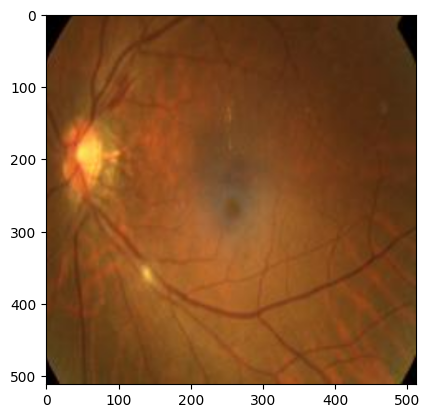

DR


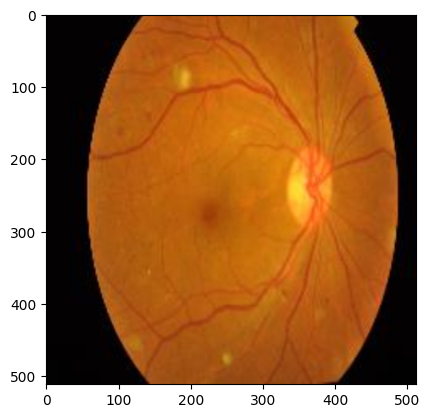

DR


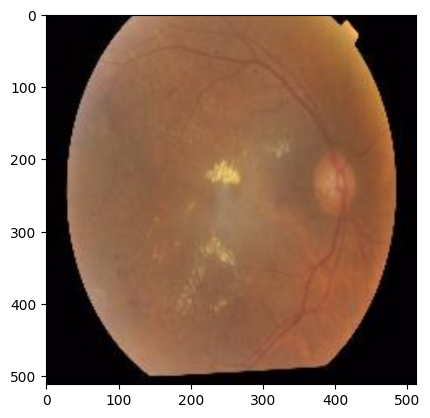

DR


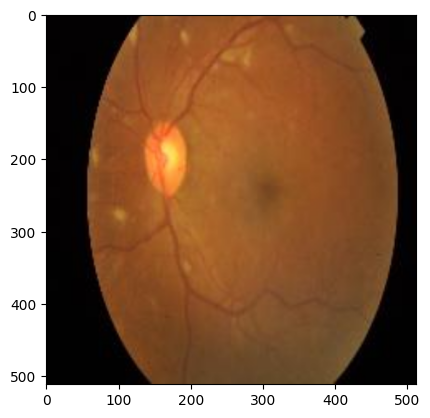

No_DR


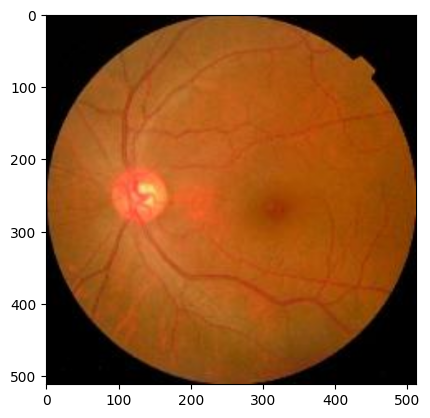

In [19]:
for i in range(5):
    plt.imshow(X_train[i])
    print(y_train[i])
    plt.show()

In [20]:
y_train = (y_train == 'DR').astype(int)

y_train.shape

(2307,)

In [21]:
y_test = (y_test == 'DR').astype(int)

y_test

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,

In [22]:
def value_counts_np(array):
    unique, counts = np.unique(array, return_counts=True)
    return dict(zip(unique, counts))

# Example usage:
counts = value_counts_np(y_train)
print(counts)

{0: 1144, 1: 1163}


In [23]:
counts = value_counts_np(y_test)
print(counts)

{0: 286, 1: 245}


## Images Processing

### Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)

In [24]:
import cv2
import numpy as np

def apply_clahe(image):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l = l.astype(np.uint8)  # Ensure 'l' is of type uint8
    a = a.astype(np.uint8)  # Ensure 'a' is of type uint8
    b = b.astype(np.uint8)  # Ensure 'b' is of type uint8
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)

# Apply to all images
X_train = np.array([apply_clahe(img) for img in X_train])
X_test = np.array([apply_clahe(img) for img in X_test])


In [25]:
X_train.shape

(2307, 512, 512, 3)

1


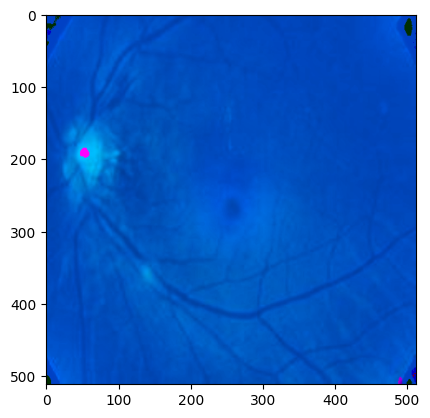

1


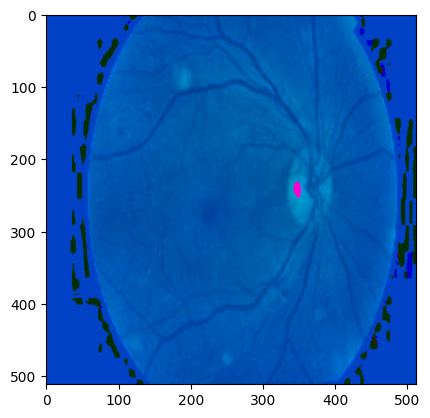

1


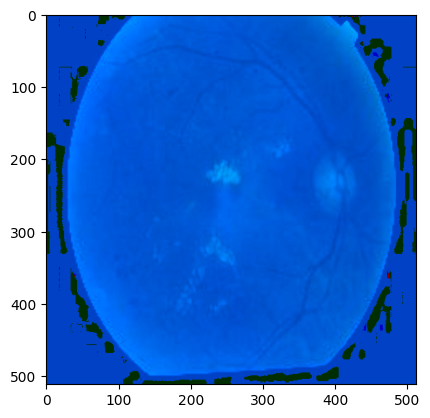

1


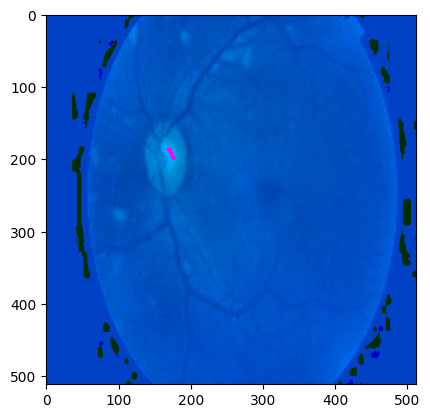

0


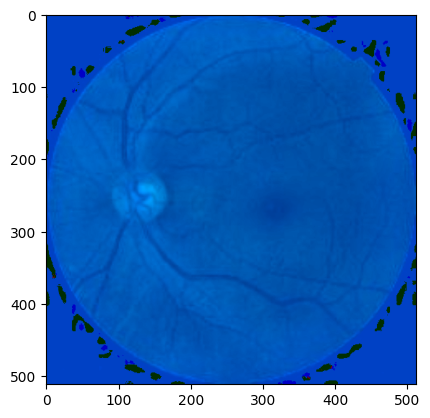

In [26]:
for i in range(5):
    plt.imshow(X_train[i])
    print(y_train[i])
    plt.show()

In [27]:
X_train.shape
y_train.shape

(2307,)

## Deep Learning

In [28]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0,ResNet50,VGG16, VGG19,DenseNet201,InceptionV3,Xception,MobileNet,MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import KFold

In [29]:
from numpy.random import seed
seed(42)# keras seed fixing
import tensorflow as tf
tf.random.set_seed(42)# tensorflow seed fixing

### Transfer Learning

In [30]:
def create_model(base_model, input_shape=(512, 512, 3)):
    base_model = base_model(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu',kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [31]:
def scheduler(epoch, lr):
    if epoch < 3:
        return lr
    else:
        return lr * 0.1

lr_scheduler = LearningRateScheduler(scheduler)

In [32]:
def k_fold_cross_validation(model, X, y, k=5, batch_size=8, epochs=5, lr_scheduler=None):
    """
    Perform k-fold cross-validation.

    Parameters:
    - model: the machine learning model to be trained.
    - X: features of the dataset.
    - y: labels of the dataset.
    - k: number of folds.
    - batch_size: batch size for training.
    - epochs: number of epochs for training.
    - lr_scheduler: learning rate scheduler callback.

    Returns:
    - A pandas DataFrame with average scores and standard deviations for accuracy, precision, recall, and F1-score.
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for i, (train_index, val_index) in enumerate(kf.split(X)):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]


        # Train the model
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        history = model.fit(
            X_train, y_train, batch_size=batch_size, epochs=epochs,
            validation_data=(X_val, y_val), callbacks=[lr_scheduler] if lr_scheduler else None, verbose=1
        )

        # Evaluate on validation set

        y_pred = model.predict(X_val)
        y_pred = (y_pred >= 0.5).astype(int)

        # Calculate metrics
        accuracy_scores.append(accuracy_score(y_val, y_pred))
        precision_scores.append(precision_score(y_val, y_pred, average='macro'))
        recall_scores.append(recall_score(y_val, y_pred, average='macro'))
        f1_scores.append(f1_score(y_val, y_pred, average='macro'))

        print(f'Fold {i+1}/{k} finished.')

    # Calculate average scores and standard deviations
    metrics = {
        'accuracy': {'mean': np.mean(accuracy_scores), 'std': np.std(accuracy_scores)},
        'precision': {'mean': np.mean(precision_scores), 'std': np.std(precision_scores)},
        'recall': {'mean': np.mean(recall_scores), 'std': np.std(recall_scores)},
        'f1_score': {'mean': np.mean(f1_scores), 'std': np.std(f1_scores)},
    }

    return pd.DataFrame(metrics)


#### EfficientNet

##### Set up the model

In [ ]:
efficientnet_model = create_model(EfficientNetB0)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##### Model Summary

In [ ]:
efficientnet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 512, 512, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 512, 512, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 512, 512, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 512, 512, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 513, 513, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 256, 256, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 256, 256, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 256, 256, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 256, 256, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 256, 256, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 256, 256, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 4,378,788 (16.70 MB)

 Trainable params: 328,705 (1.25 MB)

 Non-trainable params: 4,050,083 (15.45 MB)

##### Train the model with cross validation

In [ ]:
print(X_train.shape)
print(y_train.shape)

(2307, 512, 512, 3)
(2307,)


In [ ]:
efficinet_performance = k_fold_cross_validation(efficientnet_model, X_train, y_train, k=5,lr_scheduler=lr_scheduler)

Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 144s 580ms/step - accuracy: 0.8388 - loss: 2.9239 - val_accuracy: 0.9545 - val_loss: 0.8397 - learning_rate: 0.0010
Epoch 2/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 132s 572ms/step - accuracy: 0.8831 - loss: 0.8507 - val_accuracy: 0.9481 - val_loss: 0.4263 - learning_rate: 0.0010
Epoch 3/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 132s 570ms/step - accuracy: 0.8998 - loss: 0.5362 - val_accuracy: 0.7662 - val_loss: 0.7004 - learning_rate: 0.0010
Epoch 4/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 132s 572ms/step - accuracy: 0.9097 - loss: 0.4371 - val_accuracy: 0.9675 - val_loss: 0.2849 - learning_rate: 1.0000e-04
Epoch 5/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 131s 567ms/step - accuracy: 0.9043 - loss: 0.4079 - val_accuracy: 0.9697 - val_loss: 0.2760 - learning_rate: 1.0000e-05
15/15 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step
Fold 1/5 finished.
Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 142s 572ms/step - accuracy: 0.8867 - loss: 0.4338 - val_accuracy: 0.9502 - val_loss: 0.2972 - learning_rate: 0.0010
Epoc

In [ ]:
round(efficinet_performance,6)*100

accuracy  precision   recall  f1_score
mean   95.8386    95.8419  95.8645   95.8363
std     0.6342     0.6239   0.6768    0.6332

In [ ]:
efficientnet_train = efficientnet_model.evaluate(X_train,y_train)

73/73 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.9261 - loss: 0.2666


In [ ]:
print(f'{efficientnet_train}')

[0.25680890679359436, 0.9315127730369568]


##### Evaluating

17/17 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step
EfficientNetB0 Test accuracy: 0.937853
EfficientNetB0 Precision: 0.927419
EfficientNetB0 Recall: 0.938776
EfficientNetB0 F1-Score: 0.933063


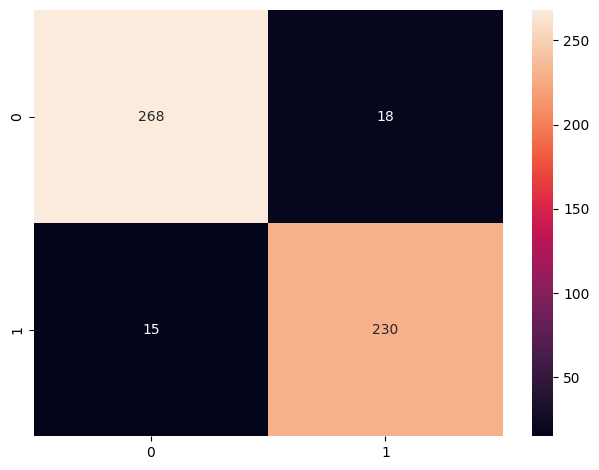

In [ ]:
y_pred = np.round(efficientnet_model.predict(X_test))
test_accuracy_efficientnet = accuracy_score(y_test, y_pred)
print(f"EfficientNetB0 Test accuracy: {test_accuracy_efficientnet:0.6f}")
efficientnet_precision = precision_score(y_test, y_pred)
efficientnet_recall = recall_score(y_test, y_pred)
efficientnet_f1 = f1_score(y_test,y_pred)
print(f"EfficientNetB0 Precision: {efficientnet_precision:0.6f}")
print(f"EfficientNetB0 Recall: {efficientnet_recall:0.6f}")
print(f"EfficientNetB0 F1-Score: {efficientnet_f1:0.6f}")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.tight_layout()
plt.show()

##### Save the model

In [ ]:
efficientnet_model.load_weights('weights/efficientnet.weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# efficientnet_model.load_weights('efficientnet.h5')

#### Resnet50

##### Set up the model

In [33]:
resnet_model = create_model(ResNet50)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##### Model Summary

In [34]:
resnet_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 512, 512, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 518, 518, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 256, 256, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 256, 256, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 256, 256, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 258, 258, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 128, 128, 64)   │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 128, 128, 64)   │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 128, 128, 64)   │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 128, 128, 64)   │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 128, 128, 64)   │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 128, 128, 64)   │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 128, 128, 64)   │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 128, 128, 256)  │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 128, 128, 256)  │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,113,537 (91.99 MB)

 Trainable params: 525,313 (2.00 MB)

 Non-trainable params: 23,588,224 (89.98 MB)

##### Train the model with cross validation

In [ ]:
resnet_performance = k_fold_cross_validation(resnet_model, X_train, y_train, k=5,lr_scheduler=lr_scheduler)

Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 188s 787ms/step - accuracy: 0.8537 - loss: 2.6586 - val_accuracy: 0.9481 - val_loss: 0.6864 - learning_rate: 0.0010
Epoch 2/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 181s 785ms/step - accuracy: 0.9119 - loss: 0.6841 - val_accuracy: 0.9524 - val_loss: 0.3772 - learning_rate: 0.0010
Epoch 3/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 181s 785ms/step - accuracy: 0.9078 - loss: 0.4843 - val_accuracy: 0.9286 - val_loss: 0.4050 - learning_rate: 0.0010
Epoch 4/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 182s 787ms/step - accuracy: 0.9224 - loss: 0.4012 - val_accuracy: 0.9697 - val_loss: 0.2677 - learning_rate: 1.0000e-04
Epoch 5/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 180s 781ms/step - accuracy: 0.9339 - loss: 0.3554 - val_accuracy: 0.9697 - val_loss: 0.2638 - learning_rate: 1.0000e-05
15/15 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step
Fold 1/5 finished.
Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 189s 786ms/step - accuracy: 0.8933 - loss: 0.4349 - val_accuracy: 0.9589 - val_loss: 0.2975 - learning_rate: 0.0010
Epoc

In [ ]:
# resnet_model.save_weights('Resnet.weights.h5')

In [ ]:
round(resnet_performance,6)*100

accuracy  precision   recall  f1_score
mean   96.1420    96.1639  96.1520   96.1386
std     0.4835     0.4743   0.5142    0.4817

In [ ]:
resnet_train =resnet_model.evaluate(X_train,y_train)
print(resnet_train)

73/73 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.9610 - loss: 0.2135
[0.20376300811767578, 0.96272212266922]


##### Evaluating

17/17 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step
ResNet50 Test accuracy: 0.958569
ResNet50 Precision: 0.982684
ResNet50 Recall: 0.926531
ResNet50 F1 Score: 0.953782


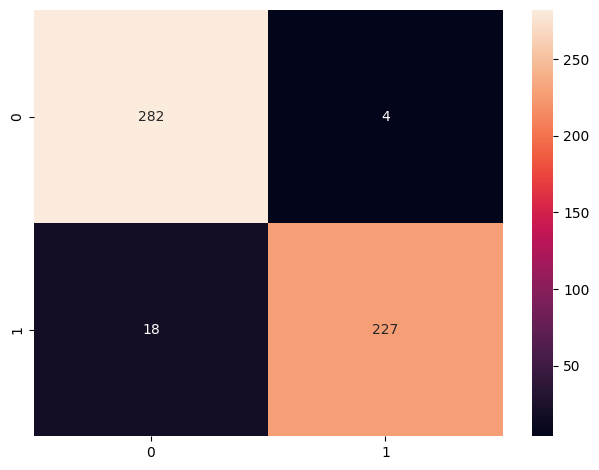

In [ ]:
y_pred = np.round(resnet_model.predict(X_test))
test_accuracy_resnet = accuracy_score(y_test,y_pred)
print(f"ResNet50 Test accuracy: {test_accuracy_resnet:0.6f}")
precision_resnet = precision_score(y_test, y_pred)
recall_resnet = recall_score(y_test, y_pred)
f1_resnet = f1_score(y_test,y_pred)
print(f"ResNet50 Precision: {precision_resnet:0.6f}")
print(f"ResNet50 Recall: {recall_resnet:0.6f}")
print(f"ResNet50 F1 Score: {f1_resnet:0.6f}")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.tight_layout()
plt.show()

##### Save the model

In [ ]:
# resnet_model.save_weights('Resnet.h5')

In [ ]:
resnet_model.load_weights('/content/weights/Resnet.weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


#### VGG 16

##### Set up the model

In [35]:
vgg16_model = create_model(VGG16)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##### Model Summary

In [36]:
vgg16_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 512, 512, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 512, 512, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 512, 512, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 256, 256, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 256, 256, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 128, 128, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 128, 128, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 128, 128, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 64, 64, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 64, 64, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 64, 64, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 32, 32, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,3

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 132,097 (516.00 KB)

 Non-trainable params: 14,715,200 (56.13 MB)

##### Train the model with cross validation

In [ ]:
vgg16_performance = k_fold_cross_validation(vgg16_model, X_train, y_train, k=5,lr_scheduler=lr_scheduler)
vgg16_model.save_weights('VGG16.weights.h5')

Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 244s 1s/step - accuracy: 0.9208 - loss: 0.3087 - val_accuracy: 0.9610 - val_loss: 0.1908 - learning_rate: 0.0010
Epoch 2/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.9356 - loss: 0.2790 - val_accuracy: 0.9589 - val_loss: 0.1799 - learning_rate: 0.0010
Epoch 3/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.9286 - loss: 0.2845 - val_accuracy: 0.9610 - val_loss: 0.2031 - learning_rate: 0.0010
Epoch 4/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.9356 - loss: 0.2664 - val_accuracy: 0.9567 - val_loss: 0.1647 - learning_rate: 1.0000e-04
Epoch 5/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.9381 - loss: 0.2535 - val_accuracy: 0.9610 - val_loss: 0.1628 - learning_rate: 1.0000e-05
15/15 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step
Fold 1/5 finished.
Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.9133 - loss: 0.3018 - val_accuracy: 0.9286 - val_loss: 0.2684 - learning_rate: 0.0010
Epoch 2/5
231/231 ━━━━

In [ ]:
round(vgg16_performance,6)*100

accuracy  precision   recall  f1_score
mean   95.9253    95.9383  95.9271   95.9212
std     0.3488     0.3151   0.3480    0.3476

In [ ]:
vgg16_train = vgg16_model.evaluate(X_train,y_train)
print(vgg16_train)

73/73 ━━━━━━━━━━━━━━━━━━━━ 232s 3s/step - accuracy: 0.9550 - loss: 0.1838
[0.17205144464969635, 0.9640225172042847]


##### Evaluating

17/17 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step
VGG16 Test accuracy: 0.960452
VGG16 Precision: 0.970588
VGG16 Recall: 0.942857
VGG16 F1-Score: 0.956522


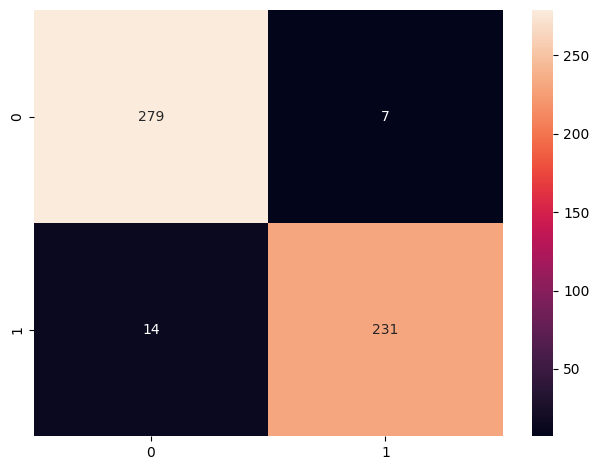

In [ ]:
y_pred = np.round(vgg16_model.predict(X_test))
test_accuracy_vgg16 = accuracy_score(y_test,y_pred)
print(f"VGG16 Test accuracy: {test_accuracy_vgg16:0.6f}")
precision_vgg16 = precision_score(y_test, y_pred)
recall_vgg16 = recall_score(y_test, y_pred)
f1_vgg16 = f1_score(y_test,y_pred)
print(f"VGG16 Precision: {precision_vgg16:0.6f}")
print(f"VGG16 Recall: {recall_vgg16:0.6f}")
print(f"VGG16 F1-Score: {f1_vgg16:0.6f}")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.tight_layout()
plt.show()

##### Save the model

In [ ]:
# vgg16_model.save_weights('VGG16.h5')

In [ ]:
vgg16_model.load_weights('/content/weights/VGG16.weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


#### VGG 19

##### Set up the model

In [37]:
vgg19_model = create_model(VGG19)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##### Model Summary

In [38]:
vgg19_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 512, 512, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 512, 512, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 512, 512, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 256, 256, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 256, 256, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 128, 128, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 128, 128, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 128, 128, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 128, 128, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 64, 64, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 64, 64, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 64, 64, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 64, 64, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 32, 32, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,156,993 (76.89 MB)

 Trainable params: 132,097 (516.00 KB)

 Non-trainable params: 20,024,896 (76.39 MB)

##### Train the model with cross validation

In [ ]:
vgg19_performance = k_fold_cross_validation(vgg19_model, X_train, y_train, k=5,lr_scheduler=lr_scheduler)
vgg19_model.save_weights('VGG19.weights.h5')

In [ ]:
round(vgg19_performance,6)*100

accuracy  precision   recall  f1_score
mean   95.2320    95.2551  95.2511   95.2293
std     0.8777     0.8885   0.8572    0.8759

In [ ]:
vgg19_train = vgg19_model.evaluate(X_train,y_train)
vgg19_train

73/73 ━━━━━━━━━━━━━━━━━━━━ 271s 4s/step - accuracy: 0.9518 - loss: 0.1935


[0.17877008020877838, 0.9622886776924133]

##### Evaluating

17/17 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step
VGG19 Test accuracy: 0.958569
VGG19 Precision: 0.966527
VGG19 Recall: 0.942857
VGG19 F1-Score: 0.954545


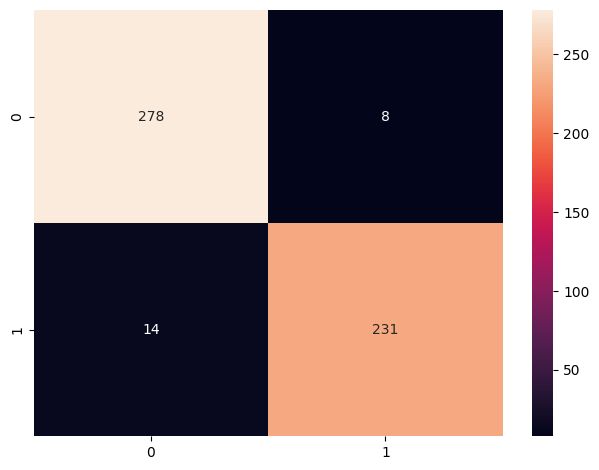

In [ ]:
y_pred = np.round(vgg19_model.predict(X_test))
test_accuracy_vgg19 = accuracy_score(y_test,y_pred)
print(f"VGG19 Test accuracy: {test_accuracy_vgg19:0.6f}")
precision_vgg19 = precision_score(y_test, y_pred)
recall_vgg19 = recall_score(y_test, y_pred)
f1_vgg19 = f1_score(y_test,y_pred)
print(f"VGG19 Precision: {precision_vgg19:0.6f}")
print(f"VGG19 Recall: {recall_vgg19:0.6f}")
print(f"VGG19 F1-Score: {f1_vgg19:0.6f}")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.tight_layout()
plt.show()

##### Save the model

In [ ]:
# vgg19_model.save_weights('VGG19.h5')

In [ ]:
vgg19_model.load_weights('/content/weights/VGG19.weights.h5')

#### DenseNet201

##### Set up the model

In [ ]:
densenet_model = create_model(DenseNet201)

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##### Model Summary

In [ ]:
densenet_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 512, 512, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 518, 518, 3)    │              0 │ input_layer_4[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 256, 256, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 256, 256, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 256, 256, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 258, 258, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 128, 128, 64)   │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 128, 128, 64)   │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 128, 128, 64)   │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 128, 128, 128)  │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 128, 128, 128)  │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 128, 128, 128)  │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 128, 128, 32)   │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 128, 128, 96)   │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 18,815,041 (71.77 MB)

 Trainable params: 492,545 (1.88 MB)

 Non-trainable params: 18,322,496 (69.89 MB)

##### Train the model with cross validation

In [ ]:
densenet_performance = k_fold_cross_validation(densenet_model, X_train, y_train, k=5,lr_scheduler=lr_scheduler)
densenet_model.save_weights('DenseNet.weights.h5')

Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 462s 2s/step - accuracy: 0.7971 - loss: 1.7935 - val_accuracy: 0.8571 - val_loss: 0.6243 - learning_rate: 0.0010
Epoch 2/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 442s 2s/step - accuracy: 0.8527 - loss: 0.5446 - val_accuracy: 0.8701 - val_loss: 0.4946 - learning_rate: 0.0010
Epoch 3/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 442s 2s/step - accuracy: 0.8523 - loss: 0.5055 - val_accuracy: 0.9026 - val_loss: 0.3966 - learning_rate: 0.0010
Epoch 4/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - accuracy: 0.8537 - loss: 0.4571 - val_accuracy: 0.9113 - val_loss: 0.3421 - learning_rate: 1.0000e-04
Epoch 5/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 450s 2s/step - accuracy: 0.8726 - loss: 0.4276 - val_accuracy: 0.9242 - val_loss: 0.3362 - learning_rate: 1.0000e-05
15/15 ━━━━━━━━━━━━━━━━━━━━ 102s 6s/step
Fold 1/5 finished.
Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 450s 2s/step - accuracy: 0.8555 - loss: 0.4681 - val_accuracy: 0.8658 - val_loss: 0.5035 - learning_rate: 0.0010
Epoch 2/5
231/231 ━━━

In [ ]:
round(densenet_performance,6)*100

accuracy  precision   recall  f1_score
mean   91.2875    91.3040  91.2993   91.2802
std     1.1405     1.1444   1.1692    1.1394

In [ ]:
densenet_train = densenet_model.evaluate(X_train,y_train)
print(densenet_train)

73/73 ━━━━━━━━━━━━━━━━━━━━ 482s 6s/step - accuracy: 0.9088 - loss: 0.3055
[0.2924560010433197, 0.9193758368492126]


##### Evaluating

17/17 ━━━━━━━━━━━━━━━━━━━━ 108s 6s/step
DenseNet201 Test accuracy: 0.926554
DenseNet201 Precision: 0.912000
DenseNet201 Recall: 0.930612
DenseNet201 F1-Score: 0.921212


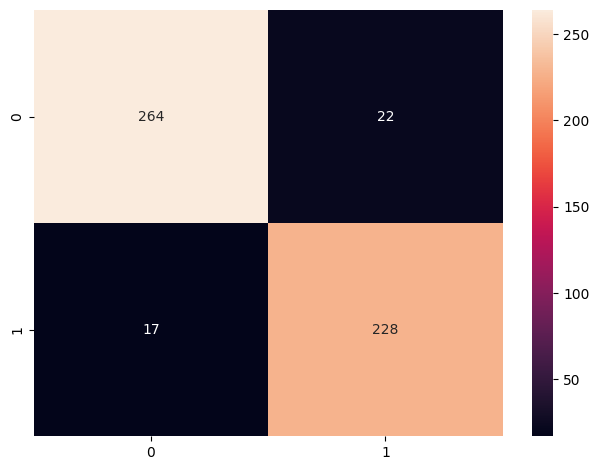

In [ ]:
y_pred = np.round(densenet_model.predict(X_test))
test_accuracy_densenet = accuracy_score(y_test,y_pred)
print(f"DenseNet201 Test accuracy: {test_accuracy_densenet:0.6f}")
precision_densenet= precision_score(y_test, y_pred)
recall_densenet = recall_score(y_test, y_pred)
f1_densenet = f1_score(y_test,y_pred)
print(f"DenseNet201 Precision: {precision_densenet:0.6f}")
print(f"DenseNet201 Recall: {recall_densenet:0.6f}")
print(f"DenseNet201 F1-Score: {f1_densenet:0.6f}")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.tight_layout()
plt.show()

##### Save the model

In [ ]:
# densenet_model.save_weights('DenseNet.h5')

In [ ]:
densenet_model.load_weights('weights/DenseNet.weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


#### InceptionV3

##### Set up the model

In [ ]:
InceptionV3_model = create_model(InceptionV3)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##### Model Summary

In [ ]:
InceptionV3_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 512, 512, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 255, 255, 32)   │            864 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 255, 255, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 255, 255, 32)   │              0 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 253, 253, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 253, 253, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 253, 253, 32)   │              0 │ batch_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 253, 253, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 253, 253, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 253, 253, 64)   │              0 │ batch_normalization_7… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 126, 126, 64)   │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 126, 126, 80)   │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 126, 126, 80)   │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 126, 126, 80)   │              0 │ batch_normalization_8… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 124, 124, 192)  │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 124, 124, 192)  │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 22,328,609 (85.18 MB)

 Trainable params: 525,313 (2.00 MB)

 Non-trainable params: 21,803,296 (83.17 MB)

##### Train the model with cross validation

In [ ]:
InceptionV3_performance = k_fold_cross_validation(InceptionV3_model, X_train, y_train, k=5,lr_scheduler=lr_scheduler)
InceptionV3_model.save_weights('InceptionV3.weights.h5')

Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 130s 529ms/step - accuracy: 0.8092 - loss: 2.1541 - val_accuracy: 0.8831 - val_loss: 0.6338 - learning_rate: 0.0010
Epoch 2/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 120s 520ms/step - accuracy: 0.8650 - loss: 0.6419 - val_accuracy: 0.8485 - val_loss: 0.5961 - learning_rate: 0.0010
Epoch 3/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 120s 521ms/step - accuracy: 0.8648 - loss: 0.5186 - val_accuracy: 0.8918 - val_loss: 0.4414 - learning_rate: 0.0010
Epoch 4/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 121s 525ms/step - accuracy: 0.8728 - loss: 0.4551 - val_accuracy: 0.9113 - val_loss: 0.3721 - learning_rate: 1.0000e-04
Epoch 5/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 119s 516ms/step - accuracy: 0.8792 - loss: 0.4392 - val_accuracy: 0.9069 - val_loss: 0.3633 - learning_rate: 1.0000e-05
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step
Fold 1/5 finished.
Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 130s 535ms/step - accuracy: 0.8624 - loss: 0.4824 - val_accuracy: 0.5152 - val_loss: 2.3980 - learning_rate: 0.0010
Epoc

In [ ]:
round(InceptionV3_performance,6)*100

accuracy  precision   recall  f1_score
mean   90.9399    91.0070  90.9821   90.9350
std     1.0531     0.9895   1.0089    1.0536

In [ ]:
InceptionV3_train = InceptionV3_model.evaluate(X_train,y_train)
print(InceptionV3_train)

73/73 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.9154 - loss: 0.2924
[0.2778279483318329, 0.92414391040802]


17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step
InceptionV3 Test accuracy: 0.903955
InceptionV3 Precision: 0.894309
InceptionV3 Recall: 0.897959
InceptionV3 F1-Score: 0.896130


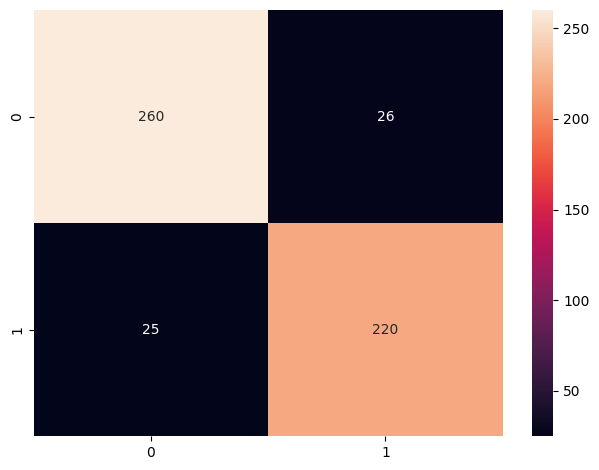

In [ ]:
y_pred = np.round(InceptionV3_model.predict(X_test))
test_accuracy_InceptionV3 = accuracy_score(y_test,y_pred)
print(f"InceptionV3 Test accuracy: {test_accuracy_InceptionV3:0.6f}")
precision_InceptionV3= precision_score(y_test, y_pred)
recall_InceptionV3 = recall_score(y_test, y_pred)
f1_InceptionV3 = f1_score(y_test,y_pred)
print(f"InceptionV3 Precision: {precision_InceptionV3:0.6f}")
print(f"InceptionV3 Recall: {recall_InceptionV3:0.6f}")
print(f"InceptionV3 F1-Score: {f1_InceptionV3:0.6f}")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.tight_layout()
plt.show()

##### Save the model

In [ ]:
# InceptionV3_model.save_weights('InceptionV3.h5')

In [ ]:
InceptionV3_model.load_weights('weights/InceptionV3.weights.h5')

##### Train the model with cross validation

#### Save the model

#### Xception

##### Set up the model

In [ ]:
Xception_model = create_model(Xception)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##### Model Summary

In [ ]:
Xception_model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 512, 512, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 255, 255, 32)   │            864 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 255, 255, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 255, 255, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 253, 253, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 253, 253, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 253, 253, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 253, 253, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 253, 253, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 253, 253, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 253, 253, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 253, 253, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_297 (Conv2D)       │ (None, 127, 127, 128)  │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 127, 127, 128)  │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 21,387,305 (81.59 MB)

 Trainable params: 525,313 (2.00 MB)

 Non-trainable params: 20,861,992 (79.58 MB)

##### Train the model with cross validation

In [ ]:
Xception_performance = k_fold_cross_validation(Xception_model, X_train, y_train, k=5,lr_scheduler=lr_scheduler)
Xception_model.save_weights('Xception.weights.h5')

Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 217s 921ms/step - accuracy: 0.7621 - loss: 1.7734 - val_accuracy: 0.8961 - val_loss: 0.4742 - learning_rate: 0.0010
Epoch 2/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 210s 909ms/step - accuracy: 0.8471 - loss: 0.5686 - val_accuracy: 0.7424 - val_loss: 0.6706 - learning_rate: 0.0010
Epoch 3/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 209s 906ms/step - accuracy: 0.8674 - loss: 0.4884 - val_accuracy: 0.9177 - val_loss: 0.3833 - learning_rate: 0.0010
Epoch 4/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 210s 911ms/step - accuracy: 0.8665 - loss: 0.4578 - val_accuracy: 0.9004 - val_loss: 0.3925 - learning_rate: 1.0000e-04
Epoch 5/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 208s 899ms/step - accuracy: 0.8755 - loss: 0.4236 - val_accuracy: 0.9113 - val_loss: 0.3389 - learning_rate: 1.0000e-05
15/15 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step
Fold 1/5 finished.
Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 217s 922ms/step - accuracy: 0.8530 - loss: 0.4393 - val_accuracy: 0.6277 - val_loss: 1.0132 - learning_rate: 0.0010
Epoc

In [ ]:
round(Xception_performance,6)*100

accuracy  precision   recall  f1_score
mean   90.7668    90.8047  90.7760   90.7591
std     1.0355     1.0238   1.0334    1.0316

In [ ]:
Xception_train = Xception_model.evaluate(X_train,y_train)
print(Xception_train)

73/73 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - accuracy: 0.9047 - loss: 0.2922
[0.27822545170783997, 0.9137408137321472]


17/17 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step
Xception Test accuracy: 0.909605
Xception Precision: 0.945701
Xception Recall: 0.853061
Xception F1-Score: 0.896996


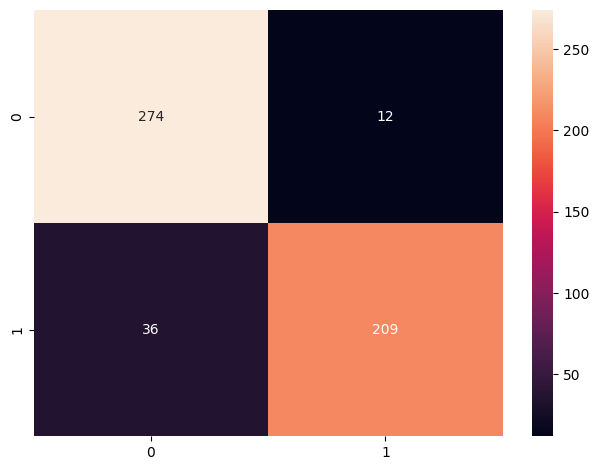

In [ ]:
y_pred = np.round(Xception_model.predict(X_test))
test_accuracy_Xception = accuracy_score(y_test,y_pred)
print(f"Xception Test accuracy: {test_accuracy_Xception:0.6f}")
precision_Xception= precision_score(y_test, y_pred)
recall_Xception = recall_score(y_test, y_pred)
f1_Xception = f1_score(y_test,y_pred)
print(f"Xception Precision: {precision_Xception:0.6f}")
print(f"Xception Recall: {recall_Xception:0.6f}")
print(f"Xception F1-Score: {f1_Xception:0.6f}")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.tight_layout()
plt.show()

##### Save the model

In [ ]:
# Xception_model.save_weights('Xception.h5')

In [ ]:
Xception_model.load_weights('weights/Xception.weights.h5')

#### MobileNet

##### Set up the model

In [ ]:
MobileNet_model = create_model(MobileNet)

<ipython-input-30-e839530316df>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = base_model(include_top=False, weights='imagenet', input_shape=input_shape)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##### Model Summary

In [ ]:
MobileNet_model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 512, 512, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 256, 256, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 256, 256, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 256, 256, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 256, 256, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 256, 256, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 256, 256, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 256, 256, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 257, 257, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 128, 128, 64)        │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 128, 128, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 128, 128, 128)       │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 128, 128, 128)       │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 128, 128, 128)       │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 128, 128, 128)       │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 128, 128, 128)       │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,492,545 (13.32 MB)

 Trainable params: 263,169 (1.00 MB)

 Non-trainable params: 3,229,376 (12.32 MB)

##### Train the model with cross validation

In [ ]:
MobileNet_performance = k_fold_cross_validation(MobileNet_model, X_train, y_train, k=5,lr_scheduler=lr_scheduler)
MobileNet_model.save_weights('MobileNet.weights.h5')

Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 72s 299ms/step - accuracy: 0.8405 - loss: 2.5691 - val_accuracy: 0.8918 - val_loss: 0.9539 - learning_rate: 0.0010
Epoch 2/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 68s 294ms/step - accuracy: 0.8801 - loss: 0.8813 - val_accuracy: 0.8095 - val_loss: 0.7906 - learning_rate: 0.0010
Epoch 3/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 68s 295ms/step - accuracy: 0.8823 - loss: 0.5987 - val_accuracy: 0.9264 - val_loss: 0.3951 - learning_rate: 0.0010
Epoch 4/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 68s 293ms/step - accuracy: 0.8868 - loss: 0.4705 - val_accuracy: 0.9351 - val_loss: 0.3751 - learning_rate: 1.0000e-04
Epoch 5/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 68s 296ms/step - accuracy: 0.8903 - loss: 0.4511 - val_accuracy: 0.9329 - val_loss: 0.3623 - learning_rate: 1.0000e-05
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 995ms/step
Fold 1/5 finished.
Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 72s 300ms/step - accuracy: 0.8898 - loss: 0.4476 - val_accuracy: 0.8961 - val_loss: 0.3836 - learning_rate: 0.0010
Epoch 2

In [ ]:
round(MobileNet_performance,6)*100

accuracy  precision   recall  f1_score
mean   92.6737    92.6784  92.6960   92.6702
std     1.0076     0.9923   1.0125    1.0060

In [ ]:
MobileNet_train = MobileNet_model.evaluate(X_train,y_train)
print(MobileNet_train)

73/73 ━━━━━━━━━━━━━━━━━━━━ 71s 978ms/step - accuracy: 0.9216 - loss: 0.2621
[0.25263822078704834, 0.9310793280601501]


17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step
MobileNet Test accuracy: 0.930320
MobileNet Precision: 0.933333
MobileNet Recall: 0.914286
MobileNet F1-Score: 0.923711


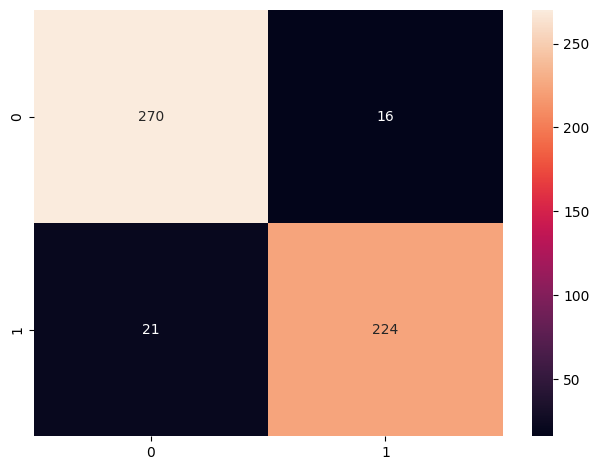

In [ ]:
y_pred = np.round(MobileNet_model.predict(X_test))
test_accuracy_MobileNet = accuracy_score(y_test,y_pred)
print(f"MobileNet Test accuracy: {test_accuracy_MobileNet:0.6f}")
precision_MobileNet= precision_score(y_test, y_pred)
recall_MobileNet = recall_score(y_test, y_pred)
f1_MobileNet= f1_score(y_test,y_pred)
print(f"MobileNet Precision: {precision_MobileNet:0.6f}")
print(f"MobileNet Recall: {recall_MobileNet:0.6f}")
print(f"MobileNet F1-Score: {f1_MobileNet:0.6f}")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.tight_layout()
plt.show()

##### Save the model

In [ ]:
# MobileNet_model.save_weights('MobileNet.h5')

In [ ]:
MobileNet_model.load_weights('weights/MobileNet.weights.h5')

#### MobileNetV2

In [ ]:
MobileNetV2_model = create_model(MobileNetV2)

<ipython-input-30-e839530316df>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = base_model(include_top=False, weights='imagenet', input_shape=input_shape)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##### Model Summary

In [ ]:
MobileNetV2_model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 512, 512, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 256, 256, 32)   │            864 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 256, 256, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 256, 256, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 256, 256, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 256, 256, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 256, 256, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 256, 256, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 256, 256, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 256, 256, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 256, 256, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 256, 256, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 257, 257, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 128, 128, 96)   │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,587,201 (9.87 MB)

 Trainable params: 328,705 (1.25 MB)

 Non-trainable params: 2,258,496 (8.62 MB)

##### Train the model with cross validation

In [ ]:
MobileNetV2_performance = k_fold_cross_validation(InceptionV3_model, X_train, y_train, k=5,lr_scheduler=lr_scheduler)
MobileNetV2_model.save_weights('MobileNetV2.weights.h5')

Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 131s 538ms/step - accuracy: 0.8684 - loss: 0.4410 - val_accuracy: 0.9048 - val_loss: 0.3502 - learning_rate: 0.0010
Epoch 2/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 121s 525ms/step - accuracy: 0.8691 - loss: 0.4411 - val_accuracy: 0.9004 - val_loss: 0.3555 - learning_rate: 0.0010
Epoch 3/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 121s 523ms/step - accuracy: 0.8733 - loss: 0.4317 - val_accuracy: 0.8961 - val_loss: 0.3766 - learning_rate: 0.0010
Epoch 4/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 121s 525ms/step - accuracy: 0.8717 - loss: 0.3997 - val_accuracy: 0.9026 - val_loss: 0.3512 - learning_rate: 1.0000e-04
Epoch 5/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 121s 526ms/step - accuracy: 0.8792 - loss: 0.3859 - val_accuracy: 0.9242 - val_loss: 0.2995 - learning_rate: 1.0000e-05
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step
Fold 1/5 finished.
Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 132s 544ms/step - accuracy: 0.8601 - loss: 0.4369 - val_accuracy: 0.6299 - val_loss: 1.1887 - learning_rate: 0.0010
Epoc

In [ ]:
round(MobileNetV2_performance,6)*100

accuracy  precision   recall  f1_score
mean   91.5465    91.5728  91.5409   91.5378
std     1.1374     1.1193   1.1388    1.1356

In [ ]:
MobileNetV2_train = MobileNetV2_model.evaluate(X_train,y_train)
print(MobileNetV2_train)

73/73 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.4913 - loss: 5.2526
[5.235594749450684, 0.5041179060935974]


17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step
MobileNetV2 Test accuracy: 0.461394
MobileNetV2 Precision: 0.461394
MobileNetV2 Recall: 1.000000
MobileNetV2 F1-Score: 0.631443


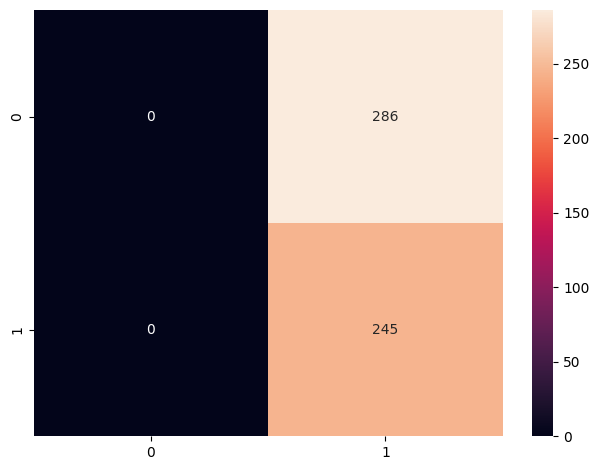

In [ ]:
y_pred = np.round(MobileNetV2_model.predict(X_test))
test_accuracy_MobileNetV2 = accuracy_score(y_test,y_pred)
print(f"MobileNetV2 Test accuracy: {test_accuracy_MobileNetV2:0.6f}")
precision_MobileNetV2= precision_score(y_test, y_pred)
recall_MobileNetV2 = recall_score(y_test, y_pred)
f1_MobileNetV2 = f1_score(y_test,y_pred)
print(f"MobileNetV2 Precision: {precision_MobileNetV2:0.6f}")
print(f"MobileNetV2 Recall: {recall_MobileNetV2:0.6f}")
print(f"MobileNetV2 F1-Score: {f1_MobileNetV2:0.6f}")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.tight_layout()
plt.show()

##### Save the model

In [ ]:
# MobileNetV2_model.save_weights('MobileNetV2.h5')

In [ ]:
# MobileNetV2_model.load_weights('MobileNetV2.h5')

## Compare the Results

In [ ]:
efficientnet_train = accuracy_score(y_train,np.round(efficientnet_model.predict(X_train)))
resnet_train = accuracy_score(y_train,np.round(resnet_model.predict(X_train)))
vgg16_train = accuracy_score(y_train,np.round(vgg16_model.predict(X_train)))
vgg19_train = accuracy_score(y_train,np.round(vgg19_model.predict(X_train)))
densenet_train = accuracy_score(y_train,np.round(densenet_model.predict(X_train)))

InceptionV3_train = accuracy_score(y_train,np.round(InceptionV3_model.predict(X_train)))
Xception_train = accuracy_score(y_train,np.round(Xception_model.predict(X_train)))
MobileNet_train = accuracy_score(y_train,np.round(MobileNet_model.predict(X_train)))
MobileNetV2_train = accuracy_score(y_train,np.round(MobileNetV2_model.predict(X_train)))

73/73 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 229s 3s/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 268s 4s/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 474s 6s/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 71s 977ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step


In [ ]:
efficintnet_accuracies = [efficientnet_train[1],test_accuracy_efficientnet,efficientnet_precision,efficientnet_recall,efficientnet_f1]
resnet_accuracies = [resnet_train[1],test_accuracy_resnet,precision_resnet,recall_resnet,f1_resnet]
vgg16_accuracies =[vgg16_train[1],test_accuracy_vgg16,precision_vgg16,recall_vgg16,f1_vgg16]
vgg19_accuracies =[vgg19_train[1],test_accuracy_vgg19,precision_vgg19,recall_vgg19,f1_vgg19]
densenet_accuracies =[densenet_train[1],test_accuracy_densenet,precision_densenet,recall_densenet,f1_densenet]

InceptionV3_accuracies =[InceptionV3_train[1],test_accuracy_InceptionV3,precision_InceptionV3,recall_InceptionV3,f1_InceptionV3]
Xception_accuracies =[Xception_train[1],test_accuracy_Xception,precision_Xception,recall_Xception,f1_Xception]
MobileNet_accuracies =[MobileNet_train[1],test_accuracy_MobileNet,precision_MobileNet,recall_MobileNet,f1_MobileNet]
MobileNetV2_accuracies =[MobileNetV2_train,test_accuracy_MobileNetV2,precision_MobileNetV2,recall_MobileNetV2,f1_MobileNetV2]

accuracies = pd.DataFrame({'Efficinet':efficintnet_accuracies,'Resnet51':resnet_accuracies,'VGG16':vgg16_accuracies,
                           'VGG19':vgg19_accuracies,'DenseNet201':densenet_accuracies,
                           'InceptionV3':InceptionV3_accuracies,
                           'Xception':Xception_accuracies,'MobileNet':MobileNet_accuracies,'MobileNetV2':MobileNetV2_accuracies})
accuracies.index = ['Train Accuracy','Test Accuracy','Precision','Recall','F1 Score']

accuracies*100

Efficinet   Resnet51      VGG16      VGG19  DenseNet201  \
Train Accuracy  93.151277  96.272212  96.402252  96.228868    91.937584   
Test Accuracy   93.785311  95.856874  96.045198  95.856874    92.655367   
Precision       92.741935  98.268398  97.058824  96.652720    91.200000   
Recall          93.877551  92.653061  94.285714  94.285714    93.061224   
F1 Score        93.306288  95.378151  95.652174  95.454545    92.121212   

                InceptionV3   Xception  MobileNet  MobileNetV2  
Train Accuracy    92.414391  91.374081  93.107933     50.41179  
Test Accuracy     90.395480  90.960452  93.032015     46.13936  
Precision         89.430894  94.570136  93.333333     46.13936  
Recall            89.795918  85.306122  91.428571    100.00000  
F1 Score          89.613035  89.699571  92.371134     63.14433

In [ ]:
accuracies *= 100
accuracies.to_csv('Final Results.csv')

## Models, Ensemble

### load the models

In [39]:
# from tensorflow.keras.models import load_model

# # Load the pre-trained models
resnet_model.load_weights('Resnet.weights.h5')
vgg19_model.load_weights('VGG19.weights.h5')
vgg16_model.load_weights('VGG16.weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import numpy as np
from collections import Counter

class CustomVotingClassifier:
    def __init__(self, models, weights=None):
        self.models = models
        self.weights = weights if weights is not None else [1] * len(models)

    def predict(self, X):
        # Get predictions from each model
        predictions = np.array([model.predict(X) for model in self.models])
        predictions = [pred.reshape(-1) if pred.ndim > 1 else pred for pred in predictions]
        # Convert predictions to class labels
        predictions = (predictions >= 0.5).astype(int)
        # Transpose to get predictions per sample
        predictions = predictions.squeeze().T

        # Perform weighted majority voting
        weighted_votes = []
        for pred in predictions:
            weighted_vote = Counter()
            for model_pred, weight in zip(pred, self.weights):
                weighted_vote[model_pred] += weight
            weighted_votes.append(weighted_vote.most_common(1)[0][0])

        return np.array(weighted_votes)

    def predict_proba(self, X):
        # Get prediction probabilities from each model
        probas = np.array([model.predict(X) for model in self.models])
        # Weight the probabilities
        weighted_probas = np.average(probas, axis=0, weights=self.weights)
        return weighted_probas


### The Evaluating Function

### Voting Classifier


In [ ]:
# Assuming efficientnet_model, vgg16_model, and vgg19_model are already trained

# Create the custom voting classifier

voting_clf = CustomVotingClassifier(models=[vgg16_model, vgg19_model,resnet_model])

# Make predictions on test data
predictions = voting_clf.predict(X_train)

# Evaluate the performance
from sklearn.metrics import accuracy_score

# Assuming test_labels are the true labels for the test data
accuracy = accuracy_score(y_train, predictions)

print("Accuracy:", accuracy)


73/73 ━━━━━━━━━━━━━━━━━━━━ 223s 3s/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 260s 4s/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step
Accuracy: 0.9666233203294322


17/17 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step
voting_clf Test accuracy: 0.966102
voting_clf Precision: 0.982979
voting_clf Recall: 0.942857
voting_clf f1_score: 0.962500


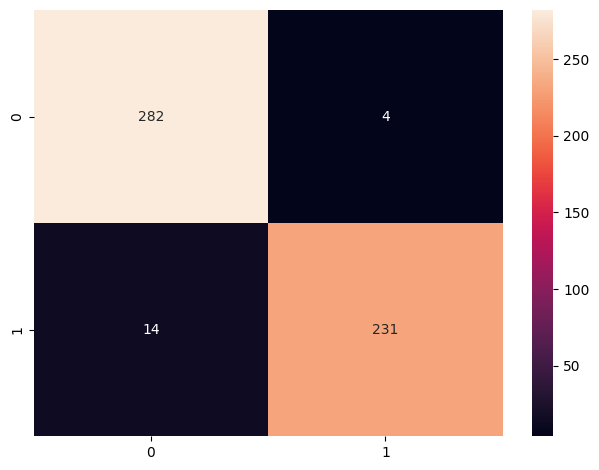

In [ ]:
y_pred = np.round(voting_clf.predict(X_test))
test_accuracy_voting_clf = accuracy_score(y_test,y_pred)
print(f"voting_clf Test accuracy: {test_accuracy_voting_clf:0.6f}")
precision_voting_clf= precision_score(y_test, y_pred)
recall_voting_clf = recall_score(y_test, y_pred)
f1_voting_clf = f1_score(y_test,y_pred)
print(f"voting_clf Precision: {precision_voting_clf:0.6f}")
print(f"voting_clf Recall: {recall_voting_clf:0.6f}")
print(f"voting_clf f1_score: {f1_voting_clf:0.6f}")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.tight_layout()
plt.show()

### Save the Voting Clf

In [ ]:
import pickle

# Define the filename for saving the classifier
filename = 'custom_voting_classifier.pkl'

# Save the classifier
with open(filename, 'wb') as file:
    pickle.dump(voting_clf, file)


In [ ]:
import pickle

# Define the filename for loading the classifier
filename = 'custom_voting_classifier.pkl'

# Load the classifier
with open(filename, 'rb') as file:
    loaded_voting_clf = pickle.load(file)


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


### Voting for all nine models

In [ ]:
# Assuming efficientnet_model, vgg16_model, and vgg19_model are already trained

# Create the custom voting classifier

voting_clf = CustomVotingClassifier(models=[vgg16_model, vgg19_model,resnet_model,efficientnet_model,MobileNet_model,MobileNetV2_model,densenet_model,Xception_model,InceptionV3_accuracies])

# Make predictions on test data
predictions = voting_clf.predict(X_train)

# Evaluate the performance
from sklearn.metrics import accuracy_score

# Assuming test_labels are the true labels for the test data
accuracy = accuracy_score(y_train, predictions)

print("Accuracy:", accuracy)


73/73 ━━━━━━━━━━━━━━━━━━━━ 228s 3s/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 266s 4s/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 72s 986ms/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 460s 6s/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step
Accuracy: 0.9635890767230169


17/17 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 993ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 109s 6s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step
voting_clf Test accuracy: 0.952919
voting_clf Precision: 0.958333
voting_clf Recall: 0.938776
voting_clf f1_score: 0.948454


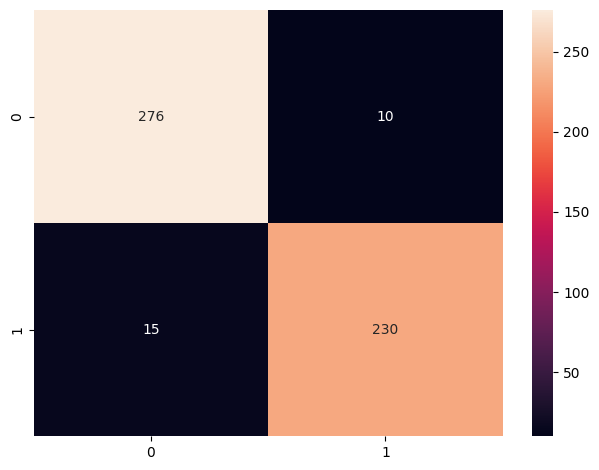

In [ ]:
y_pred = np.round(voting_clf.predict(X_test))
test_accuracy_voting_clf = accuracy_score(y_test,y_pred)
print(f"voting_clf Test accuracy: {test_accuracy_voting_clf:0.6f}")
precision_voting_clf= precision_score(y_test, y_pred)
recall_voting_clf = recall_score(y_test, y_pred)
f1_voting_clf = f1_score(y_test,y_pred)
print(f"voting_clf Precision: {precision_voting_clf:0.6f}")
print(f"voting_clf Recall: {recall_voting_clf:0.6f}")
print(f"voting_clf f1_score: {f1_voting_clf:0.6f}")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.tight_layout()
plt.show()

In [ ]:
import pickle

# Define the filename for saving the classifier
filename = 'all_models_voting_classifier.pkl'

# Save the classifier
with open(filename, 'wb') as file:
    pickle.dump(voting_clf, file)


### Stacking Classifier

In [82]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np

def create_stacking_data(X,models):
  preds = []
  for model in models:
      pred = model.predict(X)
      preds.append(pred)
  preds = np.hstack(preds)
  return preds

In [96]:
evaluation=dict()

### Logistic Regression Base Model

#### Logistic Regression Hyperparameter Tuning

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

LogisticRegression()
# Get predictions from base models
models=[vgg16_model, vgg19_model, resnet_model]
preds = create_stacking_data(X_train,models)

# Define parameter grid
param_grid = {
    'C': [0.001,0.01,0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [50,100, 200, 500],
    'fit_intercept':[True,False]
}

# Perform grid search on the stacked model predictions
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(preds, y_train)

# Best logistic regression model based on grid search
best_lr_model = grid_search.best_estimator_
print(f"Best Logistic Regression parameters: {grid_search.best_params_}")
print(f'Best Logistic Regression accuracy: {grid_search.best_score_}')

73/73 ━━━━━━━━━━━━━━━━━━━━ 224s 3s/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step
Best Logistic Regression parameters: {'C': 0.001, 'fit_intercept': True, 'max_iter': 50, 'solver': 'lbfgs'}
Best Logistic Regression accuracy: 0.9670497976354808


In [98]:
best_lr_model.fit(preds,y_train)
pred=np.round(best_lr_model.predict(preds))
print(f'Logistic Regression Stacking Classifier train Accuracy: {accuracy_score(pred,y_train)}')

Logistic Regression Stacking Classifier train Accuracy: 0.9674902470741222


In [99]:
preds = create_stacking_data(X_test,models)
p = best_lr_model.predict(preds)
accuracy_score(p,y_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step


0.9642184557438794

Logistic Regression stacking_clf Test accuracy: 0.964218
Logistic Regression stacking_clf Precision: 0.978814
Logistic Regression stacking_clf Recall: 0.942857
Logistic Regression stacking_clf f1_score: 0.960499


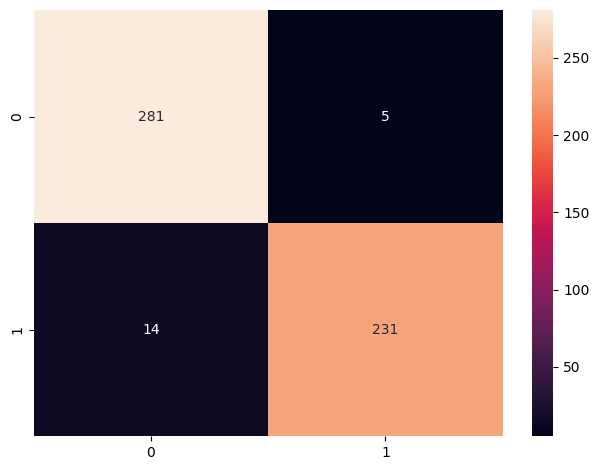

In [100]:
y_pred = p
test_accuracy_stacking_clf = accuracy_score(y_test,y_pred)
print(f"Logistic Regression stacking_clf Test accuracy: {test_accuracy_stacking_clf:0.6f}")
precision_stacking_clf= precision_score(y_test, y_pred)
recall_stacking_clf = recall_score(y_test, y_pred)
f1_stacking_clf = f1_score(y_test,y_pred)
print(f"Logistic Regression stacking_clf Precision: {precision_stacking_clf:0.6f}")
print(f"Logistic Regression stacking_clf Recall: {recall_stacking_clf:0.6f}")
print(f"Logistic Regression stacking_clf f1_score: {f1_stacking_clf:0.6f}")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.tight_layout()
plt.show()

In [101]:
evaluation['Logistic Regression'] = [test_accuracy_stacking_clf,precision_stacking_clf,recall_stacking_clf,f1_stacking_clf]

In [102]:
# import pickle

# # Define the filename for saving the classifier
# filename = 'LR_Stacking_classifier.pkl'

# # Save the classifier
# with open(filename, 'wb') as file:
#     pickle.dump(LR_Stacking_clf, file)


### Random Forest Base Model

#### Random Forest Hyperparameter Tuning

In [103]:
from sklearn.ensemble import RandomForestClassifier

# Get predictions from base models
models=[vgg16_model, vgg19_model, resnet_model]
preds = create_stacking_data(X_train,models)

# Define parameter grid
param_grid = {
    'n_estimators': [i*100 for i in range(4)],
    'max_depth': [5,20, 30, 40],
    'min_samples_split': [2, 5, 10,15]
}

# Perform grid search on the stacked model predictions
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(preds, y_train)

# Best random forest model based on grid search
best_rf_model = grid_search.best_estimator_
print(f"Best Random Forest parameters: {grid_search.best_params_}")
print(f'Best Random Forest accuracy: {grid_search.best_score_}')

73/73 ━━━━━━━━━━━━━━━━━━━━ 221s 3s/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 260s 4s/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

Best Random Forest parameters: {'max_depth': 30, 'min_samples_split': 15, 'n_estimators': 200}
Best Random Forest accuracy: 0.9666168972025805


In [104]:
from sklearn.ensemble import RandomForestClassifier

best_rf_model.fit(preds,y_train)
pred=np.round(best_rf_model.predict(preds))
print(f'Random Forest Stacking Classifier Train Accuracy: {accuracy_score(pred,y_train)}')
preds = create_stacking_data(X_test,models)
p = best_rf_model.predict(preds)
accuracy_score(p,y_test)

Random Forest Stacking Classifier Train Accuracy: 0.9718248807975726
17/17 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step


0.9623352165725048

Random Forest stacking_clf Test accuracy: 0.962335
Random Forest stacking_clf Precision: 0.974684
Random Forest stacking_clf Recall: 0.942857
Random Forest stacking_clf f1_score: 0.958506


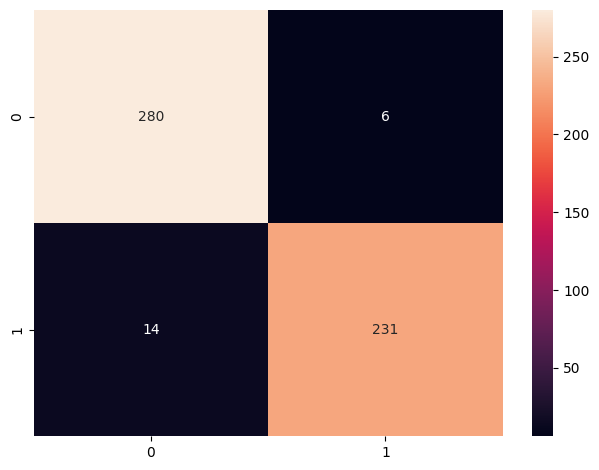

In [105]:
y_pred = p
test_accuracy_stacking_clf = accuracy_score(y_test,y_pred)
print(f"Random Forest stacking_clf Test accuracy: {test_accuracy_stacking_clf:0.6f}")
precision_stacking_clf= precision_score(y_test, y_pred)
recall_stacking_clf = recall_score(y_test, y_pred)
f1_stacking_clf = f1_score(y_test,y_pred)
print(f"Random Forest stacking_clf Precision: {precision_stacking_clf:0.6f}")
print(f"Random Forest stacking_clf Recall: {recall_stacking_clf:0.6f}")
print(f"Random Forest stacking_clf f1_score: {f1_stacking_clf:0.6f}")
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d')
plt.tight_layout()
plt.show()

In [106]:
evaluation['Random Forest'] = [test_accuracy_stacking_clf,precision_stacking_clf,recall_stacking_clf,f1_stacking_clf]

In [107]:
# import pickle

# # Define the filename for saving the classifier
# filename = 'RF_Stacking_classifier.pkl'

# # Save the classifier
# with open(filename, 'wb') as file:
#     pickle.dump(RF_Stacking_clf, file)


In [126]:
evaluation = pd.DataFrame(evaluation)
evaluation.index= ['Test Accuracy','Precision','Recall','F1 Score']
evaluation*100

Logistic Regression  Random Forest
Test Accuracy            96.421846      96.233522
Precision                97.881356      97.468354
Recall                   94.285714      94.285714
F1 Score                 96.049896      95.850622

In [128]:
evaluation.to_csv('Stacking Results')

# Explainable AI